# Proyecto 2: Primera parte
Curso Ingeniería de Características

**Estephania Pivac Alcaraz**

**Profesor: Dr. Julio Waissman**

---

**Problema de interés:**
Estudiar la relación que existe entre la cantidad de accidentes de tránsito y la inversión a la conservación de carreteras y presupuesto gubernamental.

## 1. Abriendo las bases de datos

Abrimos las bases de datos que estaremos utilizando. Para esto construiremos los dataframes necesarios así como también limpiaremos y analizaremos dichos datos.

Comenzamos importando librerías que necesitaremos

In [254]:
# Instalamos Pandas-profiling
#pip install Pandas-Profiling

# Importamos algunas librerías que vamos a necesitar
import os  # Para manejo de archivos y directorios
import urllib.request # Una forma estandard de descargar datos
# import requests # Otra forma no de las librerías de uso comun

import datetime # Fecha de descarga
import pandas as pd # Solo para ver el archivo descargado
import zipfile # Descompresión de archivos
import numpy as np
from pandas_profiling import ProfileReport

### 1.1 Tidy_accidentes: Base de datos de accidentes de tránsito

Abrimos el archivo con la información de los accidentes de tránsito en México desde 2017 hasta 2021. Generamos el dataframe con el que estaremos trabajando y convertimos cada columna al tipo de dato adecuado.

In [255]:
# Generamos el dataframe de accidentes
tidy_accidentes = pd.read_csv("tidy_accidentes.csv", index_col=False)

# Convertimos cada variable de acuerdo a su tipo
# Categoricas
#tidy_accidentes = tidy_accidentes.astype({'TIPACCID':'category', 'CAUSAACCI':'category', 'CAPAROD':'category', 'CLASACC':'category', 'EDAD':'category'})

# Fechas
tidy_accidentes['FECHA'] = pd.to_datetime(tidy_accidentes['FECHA'], format='%Y/%m/%d', errors='coerce')
#tidy_accidentes.info()

Observemos la estructura de la base de datos:

In [256]:
tidy_accidentes.head()

,ID_ENTIDAD,ANIO,TIPACCID,CAUSAACCI,CAPAROD,CLASACC,FECHA,EDAD
0,1,2021,Salida del camino,Conductor,Pavimentada,Sólo daños,2021-01-03,28-37
1,1,2021,Salida del camino,Conductor,Pavimentada,No fatal,2021-01-04,Menor de edad
2,1,2021,Colisión con vehículo automotor,Conductor,Pavimentada,Sólo daños,2021-01-17,48-57
3,1,2021,Salida del camino,Conductor,Pavimentada,Sólo daños,2021-01-26,Se fugó
4,1,2021,Colisión con vehículo automotor,Conductor,Pavimentada,Sólo daños,2021-01-28,38-47


Veamos que esta base de datos no contiene datos faltantes:

In [257]:
tidy_accidentes.isnull().sum()

ID_ENTIDAD    0
ANIO          0
TIPACCID      0
CAUSAACCI     0
CAPAROD       0
CLASACC       0
FECHA         0
EDAD          0
dtype: int64

### 1.2 Tidy conservación: Base de datos de conservación de carreteras del año 2019

Abrimos el archivo csv y lo guardamos en formato de dataframe

In [117]:
# Generamos el dataframe de conservación


tidy_conservacion = pd.read_csv("tidy_conservacion.csv", index_col=False)
tidy_conservacion

# Convertimos cada variable de acuerdo a su tipo
# Categoricas
#tidy_conservacion = tidy_conservacion.astype({'ENTIDAD':'category', 'PROGRAMA_CONSERVACION':'category'})

# Convertimos TOTAL_CONSERVACION a int
tidy_conservacion = tidy_conservacion.astype({'TOTAL_CONSERVACION':'int'})

tidy_conservacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID_ENTIDAD             1859 non-null   int64 
 1   ENTIDAD                1859 non-null   object
 2   TOTAL_CONSERVACION     1859 non-null   int64 
 3   PROGRAMA_CONSERVACION  1859 non-null   object
dtypes: int64(2), object(2)
memory usage: 58.2+ KB


In [118]:
tidy_conservacion.isnull().sum()

ID_ENTIDAD               0
ENTIDAD                  0
TOTAL_CONSERVACION       0
PROGRAMA_CONSERVACION    0
dtype: int64

In [119]:
tidy_conservacion

,ID_ENTIDAD,ENTIDAD,TOTAL_CONSERVACION,PROGRAMA_CONSERVACION
0,9,CIUDAD DE MEXICO,129436333,Estudios y/o Proyectos
1,9,CIUDAD DE MEXICO,109148272,Programa Asociación Público Privada de Conserv...
2,9,CIUDAD DE MEXICO,49970811,Programa Asociación Público Privada de Conserv...
3,9,CIUDAD DE MEXICO,85144638,Programa Asociación Público Privada de Conserv...
4,9,CIUDAD DE MEXICO,24157274,Programa Asociación Público Privada de Conserv...
...,...,...,...,...
1854,32,ZACATECAS,6094560,Conservación Rutinaria
1855,32,ZACATECAS,5716600,Conservación Rutinaria
1856,32,ZACATECAS,1633732,Otros Subprogramas
1857,32,ZACATECAS,2625802,Otros Subprogramas


In [120]:
tidy_conservacion['PROGRAMA_CONSERVACION'].value_counts()

Conservación Periódica                                  721
Conservación Rutinaria                                  632
Señalamiento                                            234
Reconstrucción                                          125
Otros Subprogramas                                       80
Coparticipación FONDEN                                   26
Conservación Rutinaria                                   14
Programa Asociación Público Privada de Conservación      11
Programa Asociación Público Privada de Conservación       7
Señalamiento                                              4
Reconstrucción                                            2
Contratos Plurianuales de Conservación de Carreteras      2
Estudios y/o Proyectos                                    1
Name: PROGRAMA_CONSERVACION, dtype: int64

### 1.3 Budget transparency: Base de datos sobre el presupuesto público aprobado de 2013 a 2021

In [121]:
# Generamos el dataframe de presupuesto
df_budget = pd.read_csv("budget_transparency.csv", index_col=False)
df_budget

# Convertimos cada variable de acuerdo a su tipo
# Categoricas
df_budget = df_budget.astype({'State':'category', 'Expenses Type ID':'category'})

# Convertimos Year a datetime
df_budget['Year'] = pd.to_datetime(df_budget['Year'], format='%Y', errors='coerce')

df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   State ID          288 non-null    int64         
 1   State             288 non-null    category      
 2   Year              288 non-null    datetime64[ns]
 3   Expenses Type ID  288 non-null    category      
 4   Expenses Type     288 non-null    object        
 5   Amount Approved   288 non-null    int64         
dtypes: category(2), datetime64[ns](1), int64(2), object(1)
memory usage: 11.1+ KB


In [122]:
# Exploramos el dataframe
df_budget

,State ID,State,Year,Expenses Type ID,Expenses Type,Amount Approved
0,1,Aguascalientes,2013-01-01,8,Gasto de Obra Pública,1511908040
1,1,Aguascalientes,2014-01-01,8,Gasto de Obra Pública,1865135779
2,1,Aguascalientes,2015-01-01,8,Gasto de Obra Pública,1659723400
3,1,Aguascalientes,2016-01-01,8,Gasto de Obra Pública,1717532284
4,1,Aguascalientes,2017-01-01,8,Gasto de Obra Pública,1230564370
...,...,...,...,...,...,...
283,32,Zacatecas,2017-01-01,8,Gasto de Obra Pública,1992505733
284,32,Zacatecas,2018-01-01,8,Gasto de Obra Pública,2284882371
285,32,Zacatecas,2019-01-01,8,Gasto de Obra Pública,2567673138
286,32,Zacatecas,2020-01-01,8,Gasto de Obra Pública,2010497486


In [123]:
# Observamos si existen datos faltantes
df_budget.isnull().sum()

State ID            0
State               0
Year                0
Expenses Type ID    0
Expenses Type       0
Amount Approved     0
dtype: int64

## 2. EDA automático utilizando Pandas-profiling y sweetview
Análisis exploratiorio de datos automático generado en html.

### 2.1 EDA: Tidy_accidentes

In [124]:
# Generamos el reporte en formato html usando pandas-profiling
prof = ProfileReport(tidy_accidentes)
prof.to_file(output_file='EDA_accientes.html')


from pandas_profiling import ProfileReport 

profile = ProfileReport(
    tidy_accidentes, 
    explorative=True,
    title='Reporte de TablaTidy.csv', 
    html={'style':{'full_width':True}}
) 
profile.to_file("TablaTidy-pandas-profiler.html")

# Probando Sweetview
#!pip install sweetviz
import sweetviz

sw_tidy_accidentes = sweetviz.analyze(tidy_accidentes)
sw_tidy_accidentes.show_html("TablaTidy-sweetview.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |      | [  0%]   00:00 -> (? left)

Report TablaTidy-sweetview.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 2.2 EDA: Tidy_conservacion

In [127]:
# Generamos el reporte en formato html usando pandas-profiling
prof = ProfileReport(tidy_conservacion)
prof.to_file(output_file='EDA_conservacion.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 2.3 EDA: df_budget

In [128]:
# Generamos el reporte en formato html usando pandas-profiling
prof = ProfileReport(df_budget)
prof.to_file(output_file='EDA_budget.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 3. EDA orientado a relación entre variables

Abordaremos variables más específicas para estudiar la relación que nos interesa.

### 3.1 Obtener un solo data frame juntando la información relevante, considerando las sumas de accidentes.

In [177]:
tidy_accidentes.head()

,ID_ENTIDAD,ANIO,TIPACCID,CAUSAACCI,CAPAROD,CLASACC,FECHA,EDAD
0,1,2021,Salida del camino,Conductor,Pavimentada,Sólo daños,2021-01-03,28-37
1,1,2021,Salida del camino,Conductor,Pavimentada,No fatal,2021-01-04,Menor de edad
2,1,2021,Colisión con vehículo automotor,Conductor,Pavimentada,Sólo daños,2021-01-17,48-57
3,1,2021,Salida del camino,Conductor,Pavimentada,Sólo daños,2021-01-26,Se fugó
4,1,2021,Colisión con vehículo automotor,Conductor,Pavimentada,Sólo daños,2021-01-28,38-47


In [178]:
df_budget.head()

,State ID,State,Year,Expenses Type ID,Expenses Type,Amount Approved
0,1,Aguascalientes,2013-01-01,8,Gasto de Obra Pública,1511908040
1,1,Aguascalientes,2014-01-01,8,Gasto de Obra Pública,1865135779
2,1,Aguascalientes,2015-01-01,8,Gasto de Obra Pública,1659723400
3,1,Aguascalientes,2016-01-01,8,Gasto de Obra Pública,1717532284
4,1,Aguascalientes,2017-01-01,8,Gasto de Obra Pública,1230564370


**Filtramos los datos de Sonora**

Queremos realizar el análisis únicamente para el estado de Sonora. Consideraremos las frecuencias de accidentes y la suma total de presupuesto anual aprobado.

In [179]:
# Accidentes
accidentes_son = tidy_accidentes[tidy_accidentes['ID_ENTIDAD']== 26].reset_index()
accidentes_son.pop('index')
accidentes_son

,ID_ENTIDAD,ANIO,TIPACCID,CAUSAACCI,CAPAROD,CLASACC,FECHA,EDAD
0,26,2021,Colisión con animal,Conductor,Pavimentada,Fatal,2021-01-08,Menor de edad
1,26,2021,Salida del camino,Conductor,Pavimentada,Sólo daños,2021-02-25,58-67
2,26,2021,Salida del camino,Conductor,Pavimentada,No fatal,2021-03-10,28-37
3,26,2021,Salida del camino,Mala condición del camino,Pavimentada,Sólo daños,2021-04-02,28-37
4,26,2021,Volcadura,Conductor,Pavimentada,Sólo daños,2021-05-15,38-47
...,...,...,...,...,...,...,...,...
1975,26,2017,Volcadura,Conductor,Pavimentada,Sólo daños,2017-12-02,18-27
1976,26,2017,Colisión con animal,Mala condición del camino,Pavimentada,Sólo daños,2017-12-03,Mayor_de_67
1977,26,2017,Colisión con vehículo automotor,Conductor,Pavimentada,No fatal,2017-12-02,18-27
1978,26,2017,Colisión con vehículo automotor,Conductor,Pavimentada,No fatal,2017-12-17,Se fugó


In [180]:
# Presupuesto
budget_son = df_budget[df_budget['State ID']== 26].reset_index()
budget_son.pop('index')
budget_son

,State ID,State,Year,Expenses Type ID,Expenses Type,Amount Approved
0,26,Sonora,2013-01-01,8,Gasto de Obra Pública,4465273769
1,26,Sonora,2014-01-01,8,Gasto de Obra Pública,5040127242
2,26,Sonora,2015-01-01,8,Gasto de Obra Pública,4883180415
3,26,Sonora,2016-01-01,8,Gasto de Obra Pública,4759231696
4,26,Sonora,2017-01-01,8,Gasto de Obra Pública,1725263163
5,26,Sonora,2018-01-01,8,Gasto de Obra Pública,2194153522
6,26,Sonora,2019-01-01,8,Gasto de Obra Pública,3191538746
7,26,Sonora,2020-01-01,8,Gasto de Obra Pública,2767475012
8,26,Sonora,2021-01-01,8,Gasto de Obra Pública,2142694615


In [181]:
# Utilizaremos onehot encoding para generar variables dummies

# Convertimos las variables categoricas al tipo adecuado
accidentes_son = accidentes_son.astype({'TIPACCID':'category', 'CAUSAACCI':'category', 'CAPAROD':'category', 'CLASACC':'category', 'EDAD':'category'})

# Creamos una copia del dataframe tidy accidentes
df_accidentes_onehot = accidentes_son.copy()

# Nos deshacemos de la columna FECHA ya que no la podremos agrupar
df_accidentes_onehot.pop('FECHA')

# Agregamos una nueva columna al dataframe que identifique cada accidente con 1.
df_accidentes_onehot['Total_accidentes'] = 1

# Identificamos las variables cualitativas
variables_cualitativas = ['TIPACCID', 'CAUSAACCI', 'CAPAROD', 'CLASACC', 'EDAD']

# Aplicamos el método OneHot:
for x in variables_cualitativas:
  df_accidentes_onehot = pd.get_dummies(
      df_accidentes_onehot, 
      columns = [x], 
      prefix = [x],
      dtype=int
  )

df_accidentes_onehot
    

,ID_ENTIDAD,ANIO,Total_accidentes,TIPACCID_Colisión con animal,TIPACCID_Colisión con ciclista,TIPACCID_Colisión con ferrocarril,TIPACCID_Colisión con motocicleta,TIPACCID_Colisión con objeto fijo,TIPACCID_Colisión con peatón (atropellamiento),TIPACCID_Colisión con vehículo automotor,...,CLASACC_No fatal,CLASACC_Sólo daños,EDAD_18-27,EDAD_28-37,EDAD_38-47,EDAD_48-57,EDAD_58-67,EDAD_Mayor_de_67,EDAD_Menor de edad,EDAD_Se fugó
0,26,2021,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,26,2021,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,26,2021,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,26,2021,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,26,2021,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,26,2017,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1976,26,2017,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1977,26,2017,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1978,26,2017,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [216]:
# Obtenemos los nombres de las columnas de nuestro dataframe
nombres_columnas = list(df_accidentes_onehot.columns.values)

# Creamos un nuevo dataframe con las mismas columnas
tidy_suma_son = pd.DataFrame(columns = nombres_columnas) 

# Sumamos el total de accidentes por año
for i in range(2017, 2022):
  df = pd.DataFrame(df_accidentes_onehot[df_accidentes_onehot['ANIO'] == i].iloc[:, 1:].sum(axis=0, numeric_only=True))
  df = df.transpose()
  df['ANIO'] = i
  tidy_suma_son = tidy_suma_son.append(df)

# Agregamos el ID estatal de Sonora en 'ID_ENTIDAD'
j=26
tidy_suma_son['ID_ENTIDAD'] = j

# Reinicamos los índices
tidy_suma_son = tidy_suma_son.reset_index(drop = True)

# Obtenemos nuestro dataframe
tidy_suma_son = tidy_suma_son.astype(int)
tidy_suma_son

,ID_ENTIDAD,ANIO,Total_accidentes,TIPACCID_Colisión con animal,TIPACCID_Colisión con ciclista,TIPACCID_Colisión con ferrocarril,TIPACCID_Colisión con motocicleta,TIPACCID_Colisión con objeto fijo,TIPACCID_Colisión con peatón (atropellamiento),TIPACCID_Colisión con vehículo automotor,...,CLASACC_No fatal,CLASACC_Sólo daños,EDAD_18-27,EDAD_28-37,EDAD_38-47,EDAD_48-57,EDAD_58-67,EDAD_Mayor_de_67,EDAD_Menor de edad,EDAD_Se fugó
0,26,2017,407,36,9,0,31,30,18,112,...,100,275,74,81,59,44,19,69,11,50
1,26,2018,434,43,8,1,37,20,22,128,...,147,244,93,69,70,48,14,66,21,53
2,26,2019,482,64,6,0,32,38,16,151,...,157,294,96,87,87,57,29,51,16,59
3,26,2020,279,39,2,0,20,21,3,80,...,95,155,61,50,43,30,11,38,10,36
4,26,2021,378,41,5,4,22,28,9,122,...,111,246,73,95,65,35,20,30,7,53


Agregamos la información sobre el presupuesto estatal aprobado anualmente en Sonora.

In [217]:
# Para facilitar el uso de la función join agregamos una columna con solo la información del año
c = []
for i in range(0, len(budget_son)):
    y = budget_son['Year'][i].year
    c.append(y)

budget_son['ANIO'] = c

In [218]:
# Agregamos la información de presupuesto al dataframe de accidentes
tidy_suma_son = tidy_suma_son.join(budget_son.set_index('ANIO'), on='ANIO')
tidy_suma_son 

,ID_ENTIDAD,ANIO,Total_accidentes,TIPACCID_Colisión con animal,TIPACCID_Colisión con ciclista,TIPACCID_Colisión con ferrocarril,TIPACCID_Colisión con motocicleta,TIPACCID_Colisión con objeto fijo,TIPACCID_Colisión con peatón (atropellamiento),TIPACCID_Colisión con vehículo automotor,...,EDAD_58-67,EDAD_Mayor_de_67,EDAD_Menor de edad,EDAD_Se fugó,State ID,State,Year,Expenses Type ID,Expenses Type,Amount Approved
0,26,2017,407,36,9,0,31,30,18,112,...,19,69,11,50,26,Sonora,2017-01-01,8,Gasto de Obra Pública,1725263163
1,26,2018,434,43,8,1,37,20,22,128,...,14,66,21,53,26,Sonora,2018-01-01,8,Gasto de Obra Pública,2194153522
2,26,2019,482,64,6,0,32,38,16,151,...,29,51,16,59,26,Sonora,2019-01-01,8,Gasto de Obra Pública,3191538746
3,26,2020,279,39,2,0,20,21,3,80,...,11,38,10,36,26,Sonora,2020-01-01,8,Gasto de Obra Pública,2767475012
4,26,2021,378,41,5,4,22,28,9,122,...,20,30,7,53,26,Sonora,2021-01-01,8,Gasto de Obra Pública,2142694615


In [219]:
# Eliminamos algunas columnas repetidas o que no resultan importantes para nuestro análisis.

columns = ['Year', 'Expenses Type ID', 'State ID']
for col in columns:
    tidy_suma_son.pop(col)
    
tidy_suma_son

,ID_ENTIDAD,ANIO,Total_accidentes,TIPACCID_Colisión con animal,TIPACCID_Colisión con ciclista,TIPACCID_Colisión con ferrocarril,TIPACCID_Colisión con motocicleta,TIPACCID_Colisión con objeto fijo,TIPACCID_Colisión con peatón (atropellamiento),TIPACCID_Colisión con vehículo automotor,...,EDAD_28-37,EDAD_38-47,EDAD_48-57,EDAD_58-67,EDAD_Mayor_de_67,EDAD_Menor de edad,EDAD_Se fugó,State,Expenses Type,Amount Approved
0,26,2017,407,36,9,0,31,30,18,112,...,81,59,44,19,69,11,50,Sonora,Gasto de Obra Pública,1725263163
1,26,2018,434,43,8,1,37,20,22,128,...,69,70,48,14,66,21,53,Sonora,Gasto de Obra Pública,2194153522
2,26,2019,482,64,6,0,32,38,16,151,...,87,87,57,29,51,16,59,Sonora,Gasto de Obra Pública,3191538746
3,26,2020,279,39,2,0,20,21,3,80,...,50,43,30,11,38,10,36,Sonora,Gasto de Obra Pública,2767475012
4,26,2021,378,41,5,4,22,28,9,122,...,95,65,35,20,30,7,53,Sonora,Gasto de Obra Pública,2142694615


### 3.2 Análisis exploratorio de datos

In [220]:
tidy_suma_son.describe()

,ID_ENTIDAD,ANIO,Total_accidentes,TIPACCID_Colisión con animal,TIPACCID_Colisión con ciclista,TIPACCID_Colisión con ferrocarril,TIPACCID_Colisión con motocicleta,TIPACCID_Colisión con objeto fijo,TIPACCID_Colisión con peatón (atropellamiento),TIPACCID_Colisión con vehículo automotor,...,CLASACC_Sólo daños,EDAD_18-27,EDAD_28-37,EDAD_38-47,EDAD_48-57,EDAD_58-67,EDAD_Mayor_de_67,EDAD_Menor de edad,EDAD_Se fugó,Amount Approved
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.00000,5.000000,5.00000,5.0000,5.000000,5.000000,5.00000,5.000000e+00
mean,26.0,2019.000000,396.000000,44.600000,6.000000,1.000000,28.400000,27.400000,13.600000,118.600000,...,242.800000,79.400000,76.40000,64.800000,42.80000,18.6000,50.800000,13.000000,50.20000,2.404225e+09
std,0.0,1.581139,75.785883,11.148991,2.738613,1.732051,7.162402,7.334848,7.569676,25.899807,...,53.335729,14.741099,17.54423,16.037456,10.66302,6.8775,17.020576,5.522681,8.58487,5.756151e+08
min,26.0,2017.000000,279.000000,36.000000,2.000000,0.000000,20.000000,20.000000,3.000000,80.000000,...,155.000000,61.000000,50.00000,43.000000,30.00000,11.0000,30.000000,7.000000,36.00000,1.725263e+09
25%,26.0,2018.000000,378.000000,39.000000,5.000000,0.000000,22.000000,21.000000,9.000000,112.000000,...,244.000000,73.000000,69.00000,59.000000,35.00000,14.0000,38.000000,10.000000,50.00000,2.142695e+09
50%,26.0,2019.000000,407.000000,41.000000,6.000000,0.000000,31.000000,28.000000,16.000000,122.000000,...,246.000000,74.000000,81.00000,65.000000,44.00000,19.0000,51.000000,11.000000,53.00000,2.194154e+09
75%,26.0,2020.000000,434.000000,43.000000,8.000000,1.000000,32.000000,30.000000,18.000000,128.000000,...,275.000000,93.000000,87.00000,70.000000,48.00000,20.0000,66.000000,16.000000,53.00000,2.767475e+09
max,26.0,2021.000000,482.000000,64.000000,9.000000,4.000000,37.000000,38.000000,22.000000,151.000000,...,294.000000,96.000000,95.00000,87.000000,57.00000,29.0000,69.000000,21.000000,59.00000,3.191539e+09


#### 3.2.1 Total de accidentes anuales y presupuesto aprobado

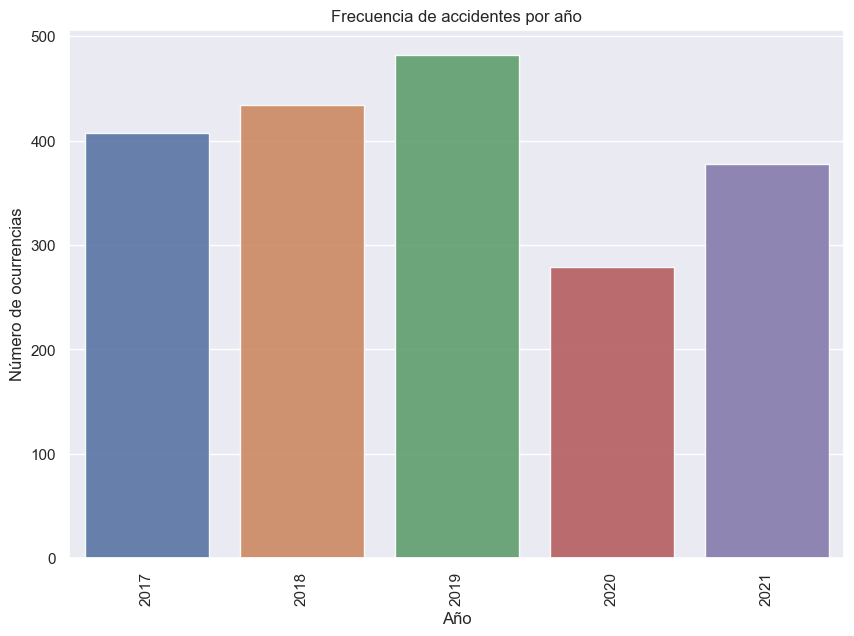

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(x = tidy_suma_son['ANIO'], y = tidy_suma_son['Total_accidentes'], alpha=0.9)

plt.title('Frecuencia de accidentes por año')
plt.ylabel('Número de ocurrencias', fontsize=12)
plt.xlabel('Año', fontsize=12)
plt.xticks(rotation=90)
plt.show()

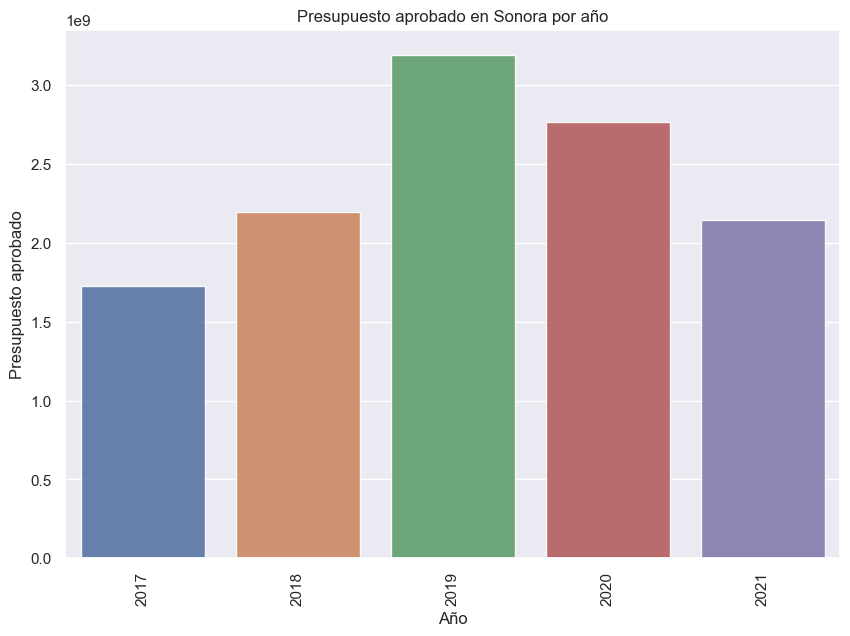

In [234]:
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(x = tidy_suma_son['ANIO'], y = tidy_suma_son['Amount Approved'], alpha=0.9)

plt.title('Presupuesto aprobado en Sonora por año')
plt.ylabel('Presupuesto aprobado', fontsize=12)
plt.xlabel('Año', fontsize=12)
plt.xticks(rotation=90)
plt.show()

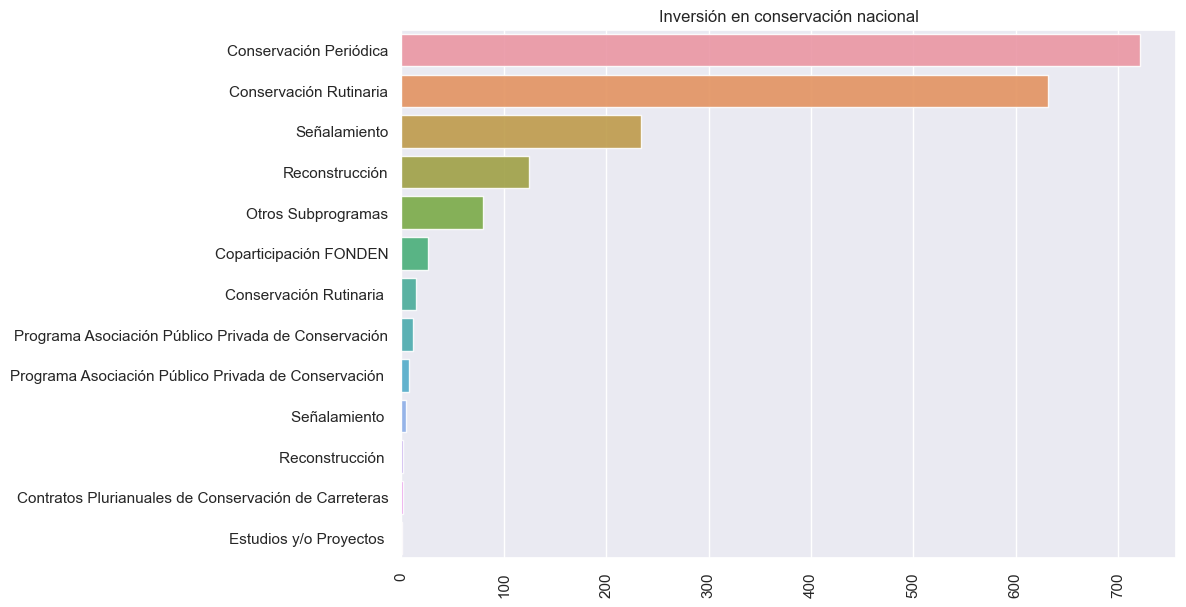

In [238]:
tipo_acc_count = tidy_conservacion['PROGRAMA_CONSERVACION'].value_counts()

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(x = tipo_acc_count.values, y = tipo_acc_count.index, alpha=0.9)

plt.title('Inversión en conservación nacional')
plt.xticks(rotation=90)
plt.show()

#### 3.2.2 Frecuencia de accidentes por tipo

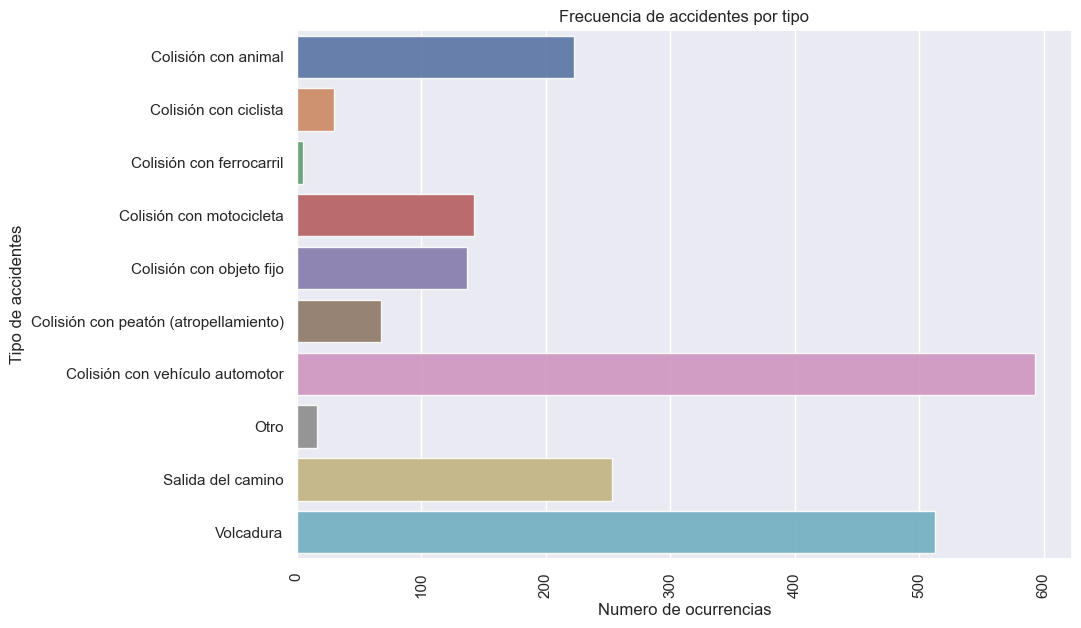

In [239]:
tipo_acc_count = tidy_accidentes_son['TIPACCID'].value_counts()

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(x = tipo_acc_count.values, y = tipo_acc_count.index, alpha=0.9)

plt.title('Frecuencia de accidentes por tipo')
plt.ylabel('Tipo de accidentes', fontsize=12)
plt.xlabel('Numero de ocurrencias', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### 3.2.3 Frecuencia de accidentes por causa

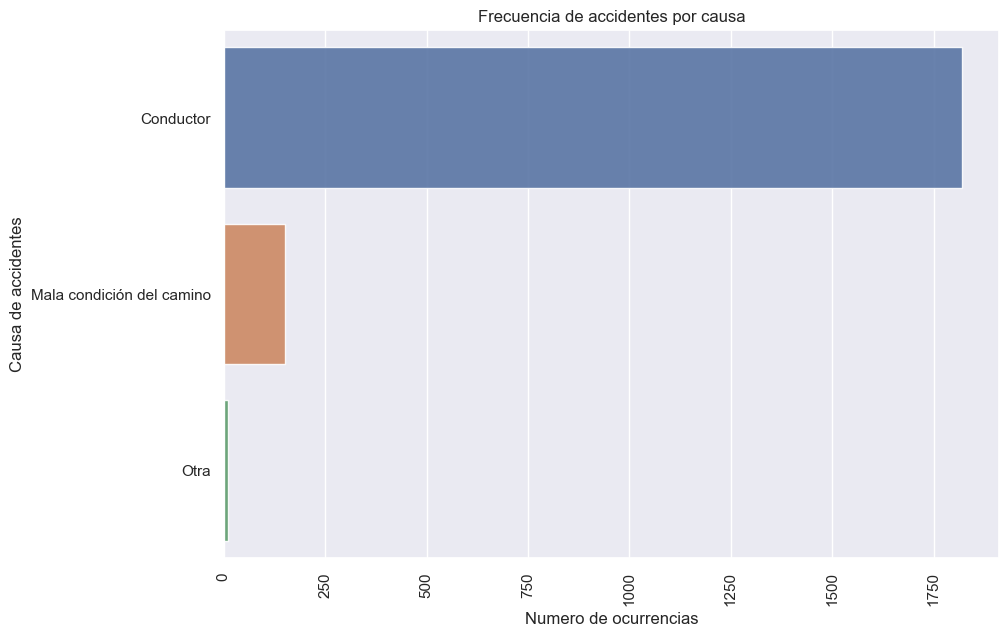

In [253]:
tipo_acc_count = tidy_accidentes_son['CAUSAACCI'].value_counts()

plt.figure(figsize=(10, 7))
#ax = plt.subplots() 
#ax.bar_label(bars)
sns.set(style="darkgrid")
sns.barplot(x = tipo_acc_count.values, y = tipo_acc_count.index, alpha=0.9)


plt.title('Frecuencia de accidentes por causa')
plt.ylabel('Causa de accidentes', fontsize=12)
plt.xlabel('Numero de ocurrencias', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### 3.2.4 Relación entre la cantidad de accidentes y el presupuesto